# How to use `contaminante`

This tutorial will show you how to use `contaminante`. If you'd like to try it yourself, you can use `contaminante` online, in the cloud, for free! Click [here](https://colab.research.google.com/github/christinahedges/contaminante/blob/master/tutorials/Colaboratory-Notebook.ipynb) to run `contaminante` online using Google's Colaboratory. 

## Using `contaminante` on *Kepler* data

To demonstrate `contaminante` we'll first use *Kepler* data. First we'll need a target to try `contaminante` on. I've chosen *KIC 6804648*. This target was observed during the prime *Kepler* mission, and was flagged as a planet candidate. In fact, the target has a contaminating eclipsing binary. This binary is only obvious in some of the *Kepler* quarters. 

Below we run the target through `contaminante`. Running this cell should take less than 5 minutes.

In [1]:
import contaminante

Modeling TPFs: 100%|██████████| 18/18 [00:38<00:00,  2.15s/it]


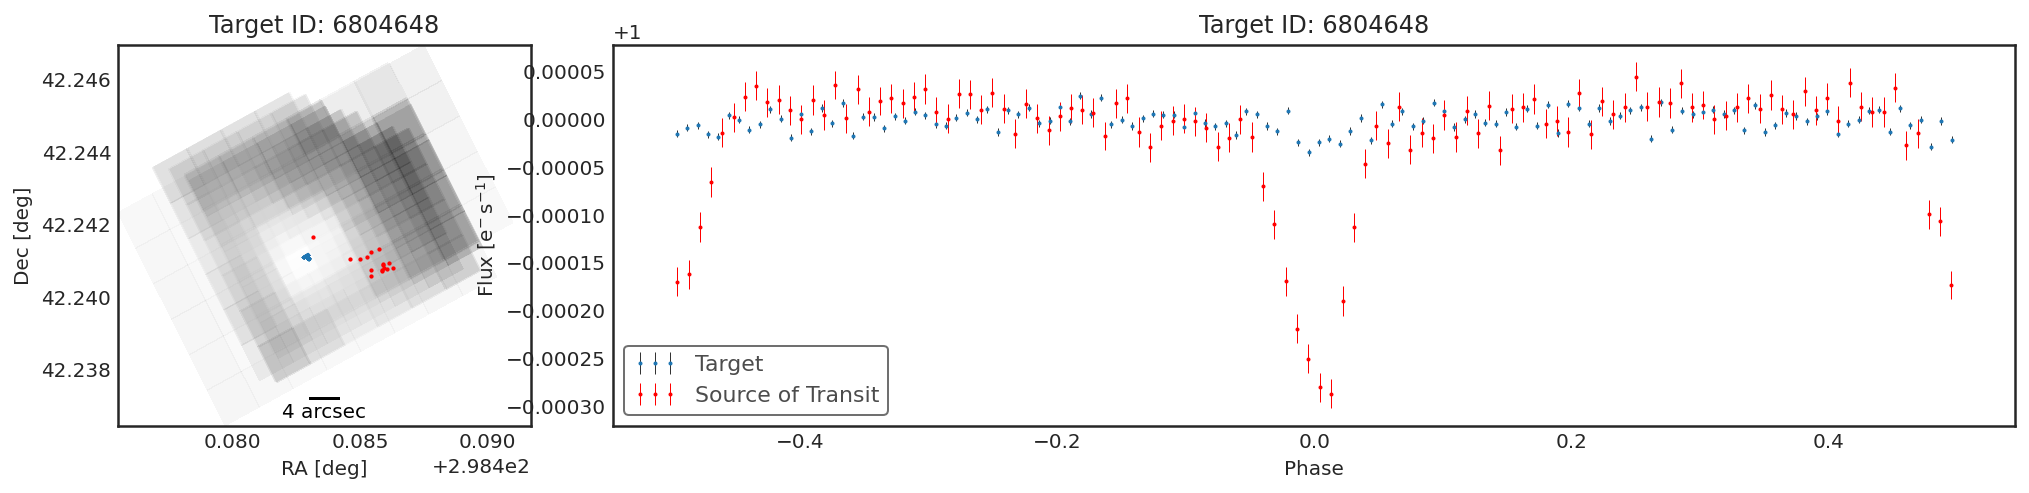

In [2]:
fig, result = contaminante.calculate_contamination(targetid='KIC {}'.format(6804648),
                               period=0.700606,
                               t0=131.59767,
                               duration=0.993/24,
                               mission='kepler')

Using `contaminante` we can see two pieces of evidence that this target is contaminated.
1. There is a significant offset between the center of the **target** (green cross) in the image, and the **source of the transiting signal** (red cross).
2. There is a significant difference between the **target** phase curve (green phase curve) and the **source of the transiting signal** phase curve (red phase curve).

The result dictionary contains the depth and positions of the target and the "contamintor", including errors. It also contains a flag for whether the target is "contaminated". The user is encouraged to 1) look at the phase curves 2) look at the positions and transit depths before claiming that a target is contaminated.

In [4]:
result

{'target_depth': (1.9786515741677145e-05, 1.4825126859866839e-06),
 'target_ra': (298.4828990638048, 5.790139785297365e-05),
 'target_dec': (42.24111733142025, 3.282872720517977e-05),
 'target_lc': KeplerLightCurve(ID: 6804648),
 'contaminator_depth': (0.000135886511438233, 3.58609560830917e-06),
 'contaminator_ra': (298.4855007357662, 0.0007406092566334789),
 'contaminator_dec': (42.240952322426466, 0.00026104036025185204),
 'contaminator_lc': KeplerLightCurve(ID: 6804648),
 'delta_transit_depth[sigma]': 29.919176136197986,
 'contaminated': True}

To compare, we can look at a target that is a true, confirmed planet. Below I run the parameters for **Kepler-10** through `contaminate`.

Modeling TPFs: 100%|██████████| 15/15 [00:35<00:00,  2.37s/it]


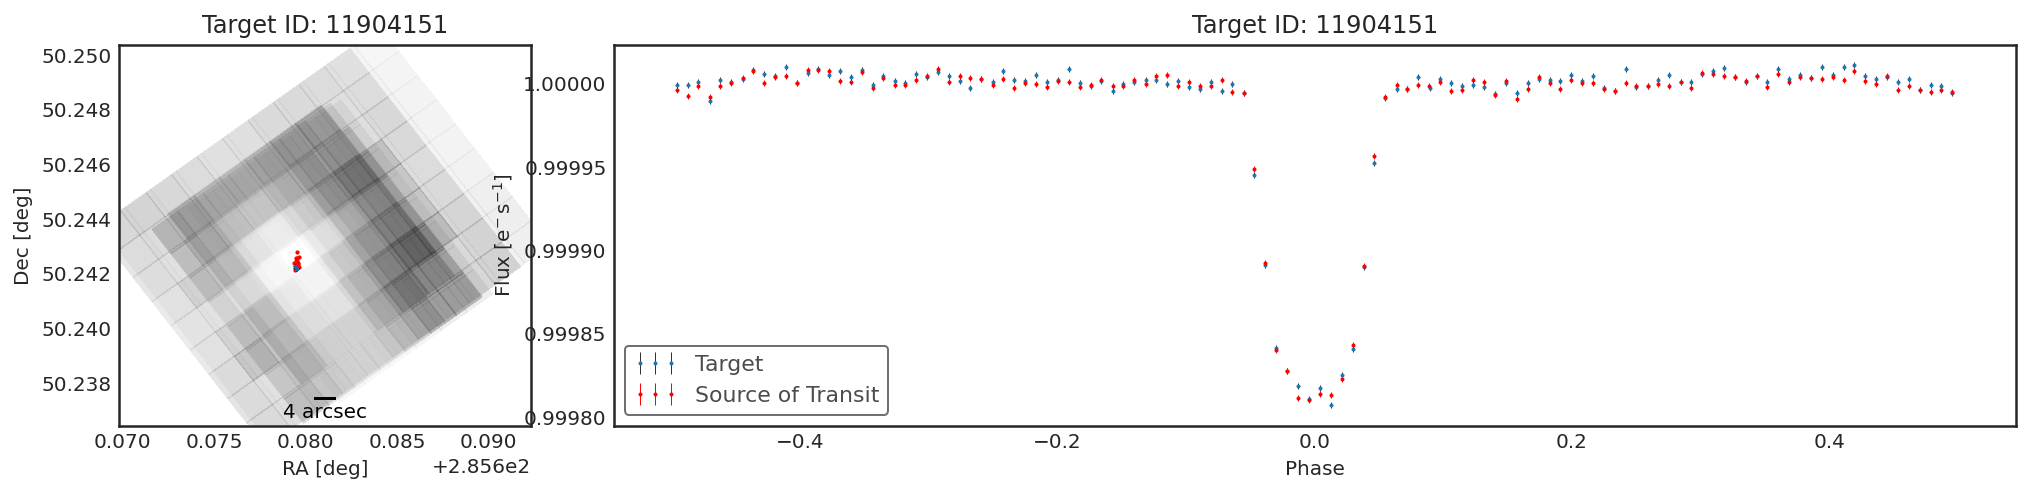

In [5]:
fig, result = contaminante.calculate_contamination(targetid='KIC {}'.format(11904151),
                               period=0.837491,
                               t0=2454964.57513 - 2454833,
                               duration=1.8076/24,
                               mission='kepler')

Sometimes there will be no significant transiting source that was not the target, and so there will be no red cross in the image, and no red phase curve in the phase curve diagram. Sometimes there will be a weak detection that there are other pixels that contain the transit, but there is frequently no significant shift if

1. The two sources line up in the image
2. There is no significant difference between the target aperture and the source aperture.

Cases such as this can suggest the aperture you are using may not be optimal to recover all of the transiting signal.

In [7]:
result

{'target_depth': (0.00015740307498197457, 4.863843399385245e-07),
 'target_ra': (285.6794790806624, 4.488928632914315e-05),
 'target_dec': (50.24221760370829, 3.9065560451455366e-05),
 'target_lc': KeplerLightCurve(ID: 11904151),
 'contaminator_depth': (0.00015658115933769157, 4.024775887519276e-07),
 'contaminator_ra': (285.6795147113718, 7.68878162630833e-05),
 'contaminator_dec': (50.242409508269034, 0.00016013861639842977),
 'contaminator_lc': KeplerLightCurve(ID: 11904151),
 'delta_transit_depth[sigma]': -1.3019116597944416,
 'contaminated': False}

## Using `contaminante` on *TESS* Data

`contaminante` works on TESS data too. The background scattered light is removed using principle component analysis. For targets that are available in the TESS pipeline TPF products, the TPFs will be used. If no TPF is available, the data will be cut out of the FFI's using the TESSCut API from MAST.

Modeling TPFs: 100%|██████████| 1/1 [00:05<00:00,  5.05s/it]


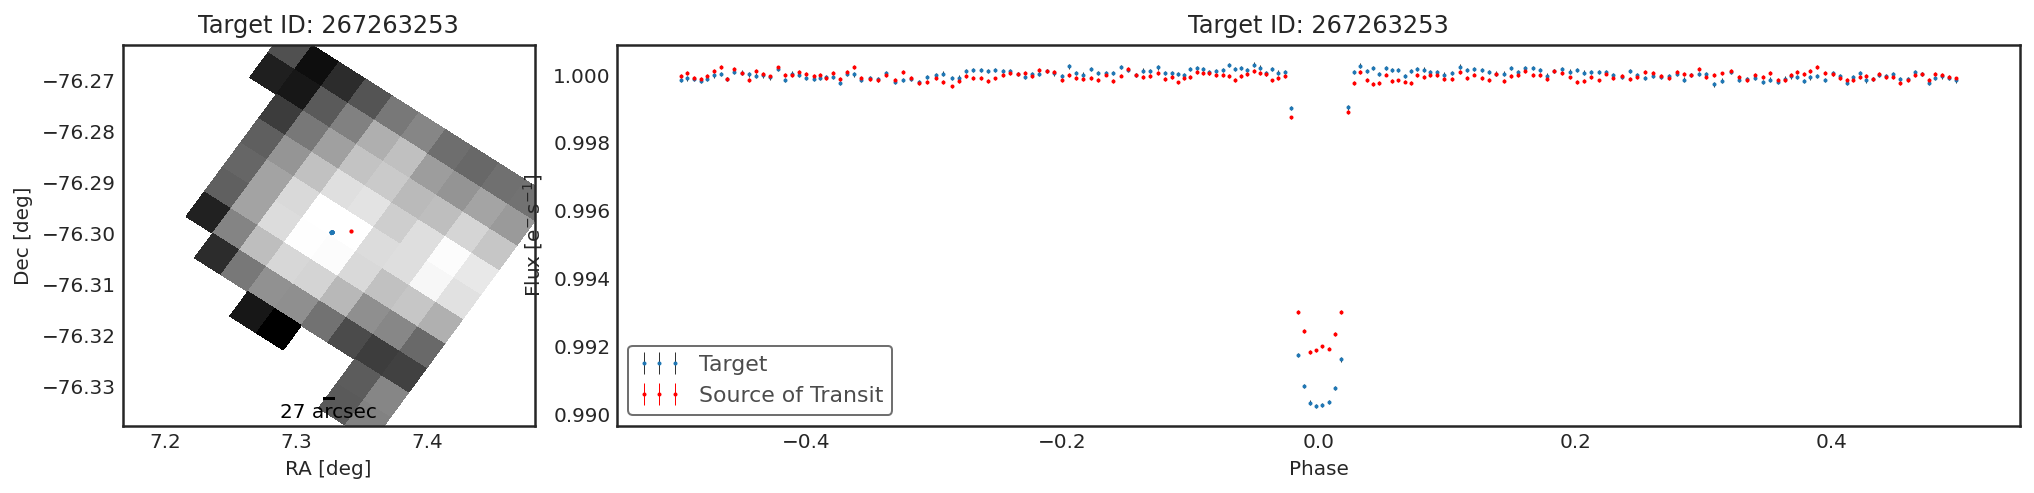

In [8]:
fig, result = contaminante.calculate_contamination(targetid="TIC 267263253",
                        period=4.12688,
                        t0=2458325.78297 - 2457000,
                        duration=0.3, mission='tess', bin_points=100)

In [9]:
result

{'target_depth': (0.005202484317257898, 1.684155511326235e-05),
 'target_ra': (7.327305315910336, 0.00011509579357354045),
 'target_dec': (-76.29980630845299, 1.9372033920663126e-05),
 'target_lc': TessLightCurve(TICID: 267263253),
 'contaminator_depth': (0.00443072592126296, 1.734094605813915e-05),
 'contaminator_ra': (7.341848081456169, 0.0),
 'contaminator_dec': (-76.29947975172522, 0.0),
 'contaminator_lc': TessLightCurve(TICID: 267263253),
 'delta_transit_depth[sigma]': -31.92612286339522,
 'contaminated': False}

## Using `contaminante` on *K2* Data

`contaminante` works on K2 data too. The motion noise is removed using the same Self Flat Fielding technique used in `lightkurve`. Because of the K2 motion the results may be a little harder to interpret. For example, below there is a slight shift in the centroid, but the light curve from that target is not different from the main target. This is likely due to the pipeline apertures for K2 being slightly too small.

Modeling TPFs: 100%|██████████| 3/3 [00:06<00:00,  2.21s/it]


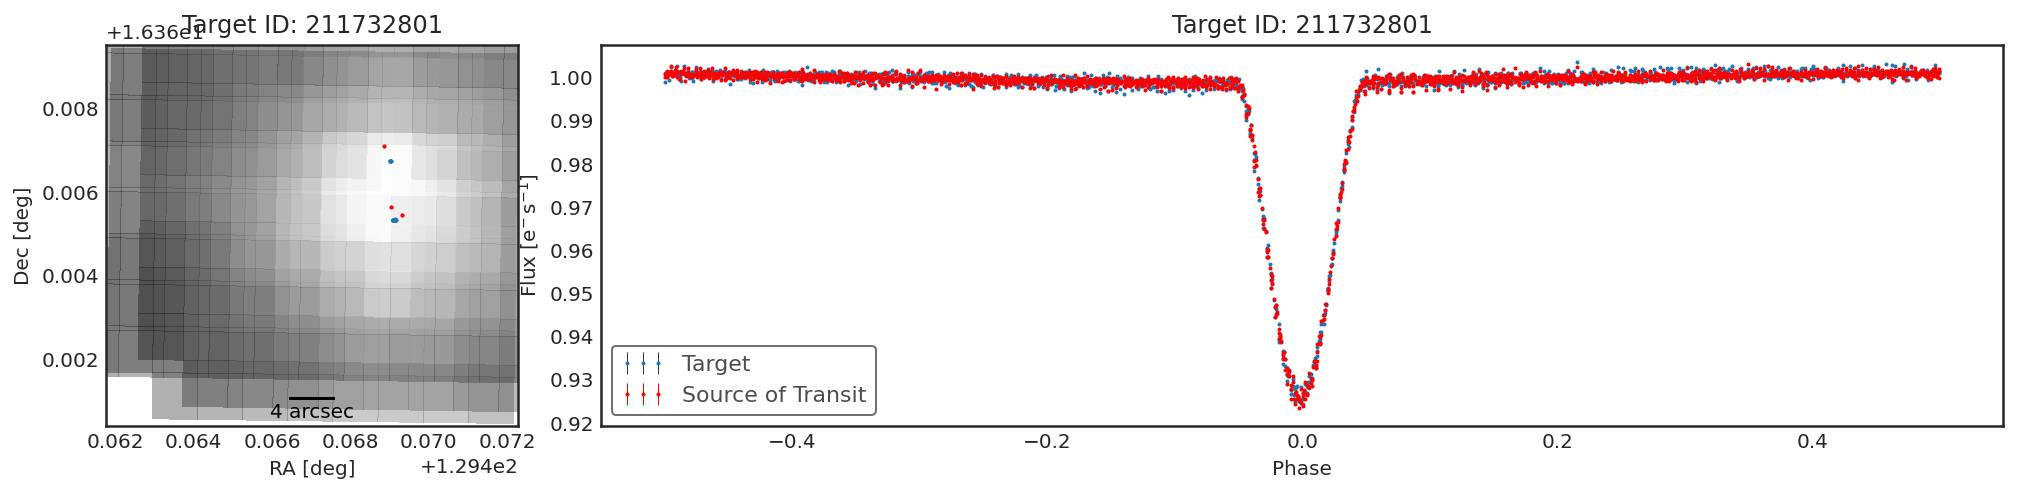

In [10]:
fig, result = contaminante.calculate_contamination(targetid="EPIC 211732801",
                        period=2.1316925,
                        t0=2308.407161,
                        duration=0.3, mission='K2', bin_points=5)

In [11]:
result

{'target_depth': (0.029372556859535316, 8.862310718170917e-07),
 'target_ra': (129.46908163510383, 5.2095146948660734e-05),
 'target_dec': (16.365801367855475, 0.0006596873088559439),
 'target_lc': KeplerLightCurve(ID: 211732801),
 'contaminator_depth': (0.029278751401570314, 1.0195674448708776e-06),
 'contaminator_ra': (129.46906745114276, 0.0001858627322052111),
 'contaminator_dec': (16.366056990046076, 0.0007328298916548428),
 'contaminator_lc': KeplerLightCurve(ID: 211732801),
 'delta_transit_depth[sigma]': -69.43937471863352,
 'contaminated': False}

## Usage notes

1. **Different quarters, campaigns and sectors.** If a target has multiple quarters, campaigns or sectors you can expect each dataset to have some slight offset, due to the target falling on different pixels.

2. **Shallower contaminator light curves.** `contaminante` looks at each pixel individually to see if there is a significant transit signal. Because faint pixels can contribute a transiting signal at a lower, less significant level, some faint pixels can be missed in contaminante. In the case that the contaminator light curve is **shallower** than the target light curve, it is likely that some faint pixels have been missed from the optimum aperture. This does not indicate that there is any contamination.

